Task:
9., Data munging with learning: on lab_5 data 

- mix the training and testing data
- separate data into three subset automatically and randonly (results of repeadet run may give different subsets): train, test, blind(rows with missing data)
- data munging: fix data extremums with data transformation (visualizsation also necessary)
- fill all the missing data with learning
- apply K-fold cross validation with graph visualization during learning
- try to relearned original target and compare the new results with the original performances
- apply different learning models for fill the data and learned the original target
- improve the final performance with choosing the best combination of the learning models (data munging and re-learning) and parameter tunning


In [204]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%matplotlib inline

In [205]:
# Össze mixeljük a train és a test adatbázist
mixed = pd.concat(map(pd.read_csv, ['train.csv', 'test.csv']), ignore_index=True)

In [206]:
mixed.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [207]:
# Megnézem, hogy melyik numerikus oszlopban lehetnek kiugró értékek. Ha a maximum nagyon eltér az átlagtól akkor azzal kezdeni kell valamit
mixed.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [208]:
#Label encoder használata a nem numerikus értékekre
#NaN értékek nincsenek megváltoztatva
from sklearn.preprocessing import LabelEncoder

encoders = dict()
#összegyűjtöm azokat az oszlopokat amiknek elemei sem nem float sem nem int típusúak
n_numeric = [i for i in mixed.select_dtypes(exclude=["float", 'int']).columns]

#alkalmazom a Label Encoder-t ezekre az oszlopokra
for column in n_numeric:
    series = mixed[column]
    label_encoder = LabelEncoder()
    mixed[column] = pd.Series(label_encoder.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index)
    encoders[column] = label_encoder


In [209]:
mixed.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981.000000,957.000000,978.000000,956.000000,981.000000,926.000000,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000,614.000000
mean,490.000000,0.809822,0.645194,0.787657,0.222222,0.128510,5179.795107,1601.916330,142.511530,342.201873,0.835920,1.053007,0.687296
std,283.334608,0.392646,0.478699,1.036453,0.415952,0.334837,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.801302,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000
25%,245.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,490.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,735.000000,1.000000,1.000000,2.000000,0.000000,0.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,980.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [210]:
#Blind adattábla készítése hiányzó adatokkal
blind = mixed[mixed.isnull().any(axis=1)]
blind.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [211]:
# Kiugró értékeket normalizáló függvény logaritmus használatával
# A logaritmus 0-nál nem értelmezhető normálisan így, ha 0 értéket venne fel valahol, akkor azt 1-re korrigáljuk
# A függvény megkapja az dataframe és a vizsgálni kívánt oszlop nevét és készít egy normalizált adtokból álló oszlopot amit hozzáad a dataframe-hez columnName_norm néven
def normalise(dataframe, column_name):
    t_col = dataframe[column_name]
    t_col = t_col.replace([0], 1)
    dataframe[column_name + '_norm'] = t_col.transform(lambda x: np.log(x))
    

In [213]:
#Gender
#Hiányzó adatok kitöltése random

# Az NaN értékeket átírom 'unknown' stringre így könnyebb az összehasonlítás
mixed['Gender'].value_counts(sort=True)
mixed['Gender'].fillna('unknown',inplace=True)
 
sex = (1, 0)
def f_gen(series):
    a = np.random.choice(sex)
    if (series['Gender'] == 'unknown'):
            return a
    else: 
            return series['Gender']

# Itt alkalmazom a megírt függvényt
mixed['Gender'] = mixed.apply(f_gen, axis='columns')
mixed['Gender'].unique()

array([1., 0.])

In [214]:
#Self_Employed
#Hiányzó adatok kitöltése random
 
mixed['Self_Employed'].value_counts(sort=True)
mixed['Self_Employed'].fillna('unknown',inplace=True)
 
sex = (1, 0)
def f_gen(series):
    a = np.random.choice(sex)
    if (series['Self_Employed'] == 'unknown'):
            return a
    else: 
            return series['Self_Employed']
    
mixed['Self_Employed'] = mixed.apply(f_gen, axis='columns')
mixed['Self_Employed'].unique()

array([0., 1.])

In [215]:
#Married
#Hiányzó adatok kitöltése random
 
mixed['Married'].value_counts(sort=True)
mixed['Married'].fillna('unknown',inplace=True)
 
sex = (1, 0)
def f_gen(series):
    a = np.random.choice(sex)
    if (series['Married'] == 'unknown'):
            return a
    else: 
            return series['Married']
    
mixed['Married'] = mixed.apply(f_gen, axis='columns')
mixed['Married'].unique()

array([0., 1.])

In [216]:
# Hiányzó adatok "tanulással" kitöltése. A meglévő adatok alapján interpoláció segítségével.
mixed['Dependents'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
mixed['LoanAmount'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
mixed['Loan_Amount_Term'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
mixed['Credit_History'].interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [217]:
# Segéd változó, kiszámolja a LoanAmount oszlop átlagát, később használjuk ezt a számot
arr = mixed['LoanAmount'].values
arr.mean()

142.97196738022427

In [218]:
#Loan_Status
#Ha a Loan Amountja nagyobb mint az átlag akkor nem kap hitelt

mixed['Loan_Status'].value_counts(sort=True)
mixed['Loan_Status'].fillna('unknown',inplace=True)
 
def f_gen(series):
    arr = mixed['LoanAmount'].values.round()
    if (series['Loan_Status'] == 'unknown'):
        if (series['LoanAmount'] >= arr.mean()):
                return 0
        else:
            return 1
    else: 
            return series['Loan_Status']
    
mixed['Loan_Status'] = mixed.apply(f_gen, axis='columns')
mixed['Loan_Status'].unique()


array([1., 0.])

In [219]:
mixed.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

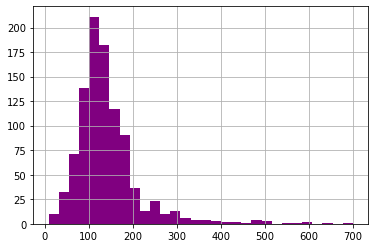

In [220]:
# A hisztogrammon látszik, hogy az adatok eléggé széjjel húznak
# Loan Amount eloszlás ábrázolás
mixed['LoanAmount'].hist(bins=30,color = 'purple') 

<AxesSubplot:>

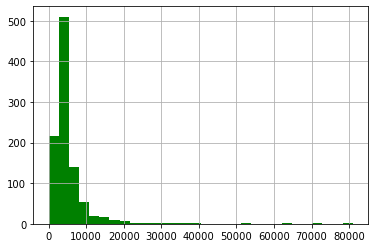

In [221]:
# Application Income eloszlás ábrázolás
mixed['ApplicantIncome'].hist(bins=30,color = 'green') 

<AxesSubplot:>

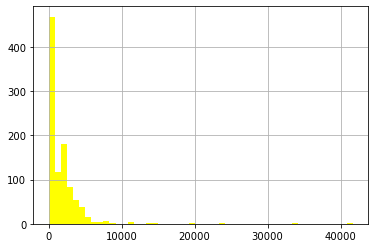

In [222]:
# CoapplicantIncome Income eloszlás ábrázolás
mixed['CoapplicantIncome'].hist(bins=50,color = 'yellow') 

<AxesSubplot:>

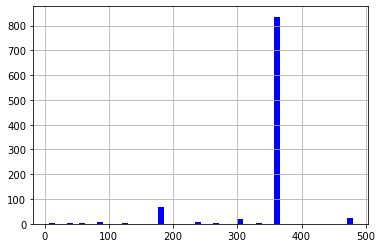

In [224]:
# Loan_Amount_Term eloszlás ábrázolás
Loan_Amount_Term
mixed['Loan_Amount_Term'].hist(bins=50,color = 'blue') 

In [225]:
#4 oszlop kiugró értékekkel
# Ezt fentebb már megnéztük, hogy miért ezek:
# ApplicantIncome
# CoapplicantIncome
# LoanAmount
# Loan_Amount_Term

# Normalizáló függvények meghívása
normalise(mixed,'ApplicantIncome') 
normalise(mixed,'CoapplicantIncome') 
normalise(mixed,'LoanAmount') 
normalise(mixed,'Loan_Amount_Term') 

<AxesSubplot:>

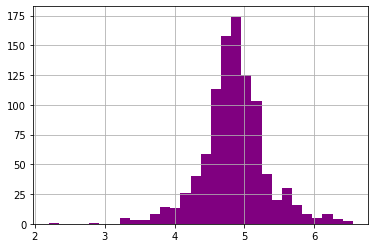

In [226]:
# Szépen látszik, hogy már nincsenek olyan távol egymástól az értékek
mixed['LoanAmount_norm'].hist(bins=30,color = 'purple') 

<AxesSubplot:>

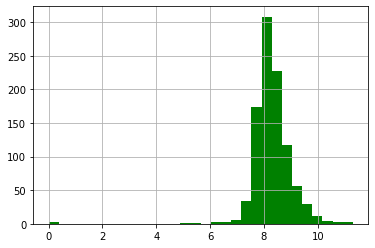

In [227]:
mixed['ApplicantIncome_norm'].hist(bins=30,color = 'green') 

<AxesSubplot:>

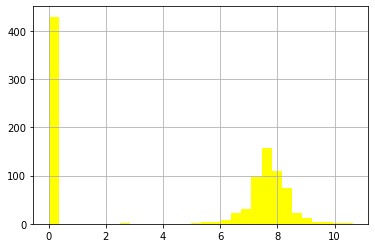

In [228]:
# A nulla felett tornyosuló oszlop a log(0)-t mesterségesen átírt értékek miatt van
mixed['CoapplicantIncome_norm'].hist(bins=30,color = 'yellow') 

<AxesSubplot:>

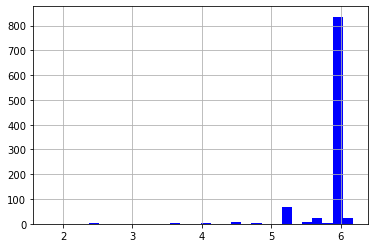

In [229]:
mixed['Loan_Amount_Term_norm'].hist(bins=30,color = 'blue') 

In [230]:
#split data first into train/test
 
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold#For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
 
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
 
    #Fit the model:
    model.fit(data[predictors],data[outcome])
 
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
 
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
 
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
 
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
 
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [232]:
mixed.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_norm', 'CoapplicantIncome_norm', 'LoanAmount_norm',
       'Loan_Amount_Term_norm'],
      dtype='object')

In [ ]:
# Végigpróbálok különböző modelleket különböző megadott oszlopokkal, ami alapján prediktálja a Loan Status oszlopot

In [283]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['ApplicantIncome', 'LoanAmount_norm', 'Credit_History']
classification_model(model, mixed, predictor_var, outcome_var)

Accuracy : 66.871%
Cross-Validation Score : 72.778%


In [284]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['ApplicantIncome', 'LoanAmount_norm', 'Credit_History']
classification_model(model, mixed, predictor_var, outcome_var)

Accuracy : 99.796%
Cross-Validation Score : 65.644%


In [285]:
outcome_var = 'Loan_Status'
model = RandomForestClassifier()
predictor_var = ['ApplicantIncome', 'LoanAmount_norm', 'Credit_History']
classification_model(model, mixed, predictor_var, outcome_var)

Accuracy : 99.796%
Cross-Validation Score : 66.971%


In [286]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

ApplicantIncome    0.441233
LoanAmount_norm    0.372035
Credit_History     0.186732
dtype: float64
